### 역별 분석

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [238]:
plt.rcParams['font.family']='HYGPRM'

In [239]:
df1=pd.read_csv("MetroData/2201.csv")
df2=pd.read_csv("MetroData/2202.csv")
df3=pd.read_csv("MetroData/2203.csv")
df4=pd.read_csv("MetroData/2204.csv")
df5=pd.read_csv("MetroData/2205.csv")
df6=pd.read_csv("MetroData/2206.csv")
df7=pd.read_csv("MetroData/2207.csv")
df8=pd.read_csv("MetroData/2208.csv")
df9=pd.read_csv("MetroData/2022.csv")

In [240]:
df9.역.unique()

array(['수서', '학여울', '대청', '일원', '창동', '신설동', '동대문', '종로5가', '서울역', '동묘앞',
       '시청', '종각', '종로3가', '구로디지털단지', '신대방', '신림', '봉천', '서울대입구(관악구청)',
       '낙성대(강감찬)', '사당', '방배', '서초', '교대(법원.검찰청)', '강남', '역삼', '선릉',
       '삼성(무역센터)', '종합운동장', '잠실새내', '잠실(송파구청)', '잠실나루', '강변(동서울터미널)',
       '구의(광진구청)', '건대입구', '성수', '뚝섬', '한양대', '왕십리(성동구청)', '상왕십리', '신당',
       '동대문역사문화공원(DDP)', '을지로4가', '을지로3가', '을지로입구', '청량리(서울시립대입구)', '제기동',
       '이대', '일산', '탄현', '복정', '신촌', '홍대입구', '합정', '당산', '영등포구청', '문래',
       '신도림', '대림(구로구청)', '지평', '용문', '원덕', '양평', '오빈', '아신', '국수', '신원',
       '양수', '운길산', '팔당', '도심', '덕소', '양정', '도농', '구리', '양원', '망우',
       '상봉(시외버스터미널)', '중랑', '회기', '신창(순천향대)', '온양온천', '배방', '탕정', '아산',
       '쌍용(나사렛대)', '봉명', '대화', '주엽', '정발산', '마두', '백석', '대곡', '화정', '원당',
       '삼송', '원흥', '보문', '성신여대입구(돈암)', '정릉', '북한산보국문', '솔샘', '삼양사거리',
       '삼양', '화계', '가오리', '4.19민주묘지', '솔밭공원', '북한산우이', '수리산', '오이도', '정왕',
       '신길온천', '안산', '초지', '고잔', '중앙', '한대앞', '상록수', '반월', '대야

### 역별 승객 데이터

In [241]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).mean()

,승차승객,하차승객,총 승객
역,,,
4.19민주묘지,2835.794239,2648.514403,5484.308642
가능,5991.555556,5731.086420,11722.641975
가락시장,7059.563786,7350.170782,14409.734568
가산디지털단지,24495.405350,25609.767490,50105.172840
가양,17940.041152,17380.423868,35320.465021
...,...,...,...
회기,22136.893004,21401.835391,43538.728395
회룡,11207.921811,11094.000000,22301.921811
회현(남대문시장),20525.320988,21529.827160,42055.148148


In [242]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).sum()

,승차승객,하차승객,총 승객
역,,,
4.19민주묘지,689098,643589,1332687
가능,1455948,1392654,2848602
가락시장,3430948,3572183,7003131
가산디지털단지,11904767,12446347,24351114
가양,4359430,4223443,8582873
...,...,...,...
회기,5379265,5200646,10579911
회룡,2723525,2695842,5419367
회현(남대문시장),4987653,5231748,10219401


### 많은 순으로 정렬

In [243]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).mean().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
역,,,
강남,71148.094650,69960.296296,141108.390947
구로디지털단지,49118.683128,48950.687243,98069.370370
삼성(무역센터),44035.452675,44269.156379,88304.609053
역삼,40589.000000,45437.427984,86026.427984
서울대입구(관악구청),41717.621399,40957.534979,82675.156379
...,...,...,...
굴포천,1.206897,0.000000,1.206897
부평구청,1.185185,0.000000,1.185185
춘의,1.178571,0.000000,1.178571


In [244]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).sum().sort_values(by="총 승객", ascending=False)

,승차승객,하차승객,총 승객
역,,,
잠실(송파구청),19010542,19254739,38265281
강남,17288987,17000352,34289339
고속터미널,16712491,16651220,33363711
홍대입구,16095209,16956884,33052093
서울역,16402326,16425681,32828007
...,...,...,...
굴포천,35,0,35
춘의,33,0,33
부평구청,32,0,32


### 상하위 20개씩 보기 

In [245]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).mean().sort_values(by="총 승객", ascending=False).head(20)

,승차승객,하차승객,총 승객
역,,,
강남,71148.094650,69960.296296,141108.390947
구로디지털단지,49118.683128,48950.687243,98069.370370
삼성(무역센터),44035.452675,44269.156379,88304.609053
역삼,40589.000000,45437.427984,86026.427984
서울대입구(관악구청),41717.621399,40957.534979,82675.156379
잠실(송파구청),39116.341564,39618.804527,78735.146091
신림,39530.327434,38372.513274,77902.840708
영등포,36468.798354,37382.646091,73851.444444
용산,33998.316872,34400.786008,68399.102881


In [246]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).sum().sort_values(by="총 승객", ascending=False).head(20)

,승차승객,하차승객,총 승객
역,,,
잠실(송파구청),19010542,19254739,38265281
강남,17288987,17000352,34289339
고속터미널,16712491,16651220,33363711
홍대입구,16095209,16956884,33052093
서울역,16402326,16425681,32828007
사당,13612957,13604198,27217155
선릉,13466324,13551353,27017677
신림,13400781,13008282,26409063
가산디지털단지,11904767,12446347,24351114


In [247]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).mean().sort_values(by="총 승객", ascending=False).tail(20)

,승차승객,하차승객,총 승객
역,,,
원덕,377.411523,360.592593,738.004115
세종대왕릉,317.711934,317.506173,635.218107
상천,320.448560,292.259259,612.707819
야목,341.711934,257.300412,599.012346
오빈,293.740741,288.074074,581.814815
신원,222.123457,186.345679,408.469136
굴봉산,171.386831,165.781893,337.168724
백양리,164.967078,147.584362,312.551440
달월,91.839506,64.913580,156.753086


In [248]:
df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).sum().sort_values(by="총 승객", ascending=False).tail(20)

,승차승객,하차승객,총 승객
역,,,
원덕,91711,87624,179335
세종대왕릉,77204,77154,154358
상천,77869,71019,148888
야목,83036,62524,145560
오빈,71379,70002,141381
신원,53976,45282,99258
굴봉산,41647,40285,81932
백양리,40087,35863,75950
달월,22317,15774,38091


### 결과확인
#### 총 승객 평균 정보
 - 상위 역에는 2호선에 속해있는 역들이 많다
 - 하위 역에는 7호선에 속해있는 역들이 많다
 - 하위 9개 역의 총 승객 평균은 1점대이다
 - 하위 9개 역은 하차 승객이 0이다
#### 총 승객 합 정보
 - 상위 역에는 2호선에 속해있는 역들이 많다
 - 하위 역에는 7호선에 속해있는 역들이 많다
 - 하위 9개 역의 총 승객 수는 100명이 안 된다
 - 하위 9개 역은 하차 승객이 0이다
#### 참고사항
 - 총 승객 하위 역 중 하차 승객이 0인 역 중 일부는 환승역이어서 다른 노선으로 집계되기도 한다
 - 7호선 일부 역들은 인천교통공사로 이관되어 서울시 데이터에 잡히지 않는다

### 역별 카운트

In [249]:
df9.역.value_counts().sort_values(ascending=False)

서울역          1215
공덕            972
김포공항          733
왕십리(성동구청)     729
종로3가          729
             ... 
굴포천            29
춘의             28
부평구청           27
삼산체육관          15
부천종합운동장         9
Name: 역, Length: 529, dtype: int64

In [250]:
df9.역.value_counts().sort_values(ascending=False).head(30)

서울역               1215
공덕                 972
김포공항               733
왕십리(성동구청)          729
종로3가               729
동대문역사문화공원(DDP)     729
디지털미디어시티           729
신설동                729
고속터미널              729
홍대입구               729
온수(성공회대입구)         486
옥수                 486
이촌(국립중앙박물관)        486
잠실(송파구청)           486
수원                 486
신촌                 486
천호(풍납토성)           486
신길                 486
불광                 486
인천                 486
가락시장               486
사당                 486
동대문                486
신당                 486
선릉                 486
건대입구               486
도봉산                486
종합운동장              486
마곡나루(서울식물원)        486
동묘앞                486
Name: 역, dtype: int64

### 환승역 개수 확인하기

In [296]:
station_cross = df9[['역','노선']].drop_duplicates().sort_values('역').reset_index(drop=True)
station_cross

,역,노선
0,4.19민주묘지,우이신설선
1,가능,경원선
2,가락시장,8호선
3,가락시장,3호선
4,가산디지털단지,7호선
...,...,...
616,회룡,경원선
617,회현(남대문시장),4호선
618,효창공원앞,6호선
619,효창공원앞,경의선


In [298]:
s = station_cross.역.value_counts()
s[s>2]

서울역               5
공덕                4
김포공항              4
홍대입구              3
디지털미디어시티          3
동대문역사문화공원(DDP)    3
왕십리(성동구청)         3
종로3가              3
신설동               3
고속터미널             3
Name: 역, dtype: int64

### 상위 5개역 확인

In [251]:
df9[df9['역'] == '서울역'].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
1호선,39586.860082,38310.020576,77896.880658,1276.839506,4.526749,15.703704
4호선,9272.646091,15287.296296,24559.942387,-6014.650206,4.526749,15.703704
경부선,7034.637860,2066.658436,9101.296296,4967.979424,4.526749,15.703704
경의선,3418.707819,4277.572016,7696.279835,-858.864198,4.526749,15.703704
공항철도 1호선,8186.432099,7653.847737,15840.279835,532.584362,4.526749,15.703704


In [252]:
df9[df9['역'] == '공덕'].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
5호선,11461.197531,12077.213992,23538.411523,-616.016461,4.526749,15.703704
6호선,15209.423868,14675.567901,29884.991770,533.855967,4.526749,15.703704
경의선,3164.213992,2735.296296,5899.510288,428.917695,4.526749,15.703704
공항철도 1호선,2027.094650,2721.736626,4748.831276,-694.641975,4.526749,15.703704


In [253]:
df9[df9['역'] == '김포공항'].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
5호선,7302.497942,7137.629630,14440.127572,164.868313,4.526749,15.703704
9호선,7370.864198,11190.502058,18561.366255,-3819.637860,4.526749,15.703704
경의선,1.250000,0.000000,1.250000,1.250000,4.750000,16.250000
공항철도 1호선,11664.444444,6316.012346,17980.456790,5348.432099,4.526749,15.703704


In [254]:
df9[df9['역'] == '왕십리(성동구청)'].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
2호선,14517.333333,12153.938272,26671.271605,2363.395062,4.526749,15.703704
5호선,3988.460905,4642.884774,8631.345679,-654.423868,4.526749,15.703704
경원선,13156.934156,14600.230453,27757.164609,-1443.296296,4.526749,15.703704


In [255]:
df9[df9['역'] == '종로3가'].groupby(["노선"]).mean()

,승차승객,하차승객,총 승객,승차-하차,월,일
노선,,,,,,
1호선,22701.884774,20783.423868,43485.308642,1918.460905,4.526749,15.703704
3호선,8390.168724,10008.510288,18398.679012,-1618.341564,4.526749,15.703704
5호선,11793.547325,11649.506173,23443.053498,144.041152,4.526749,15.703704


### 결과
 - 서울역이 가장 많이 등장
 - 교차하는 노선이 많을수록 빈번하게 등장하며, 이는 환승역일수록 빈도수가 높다는 의미

### 역별 그래프

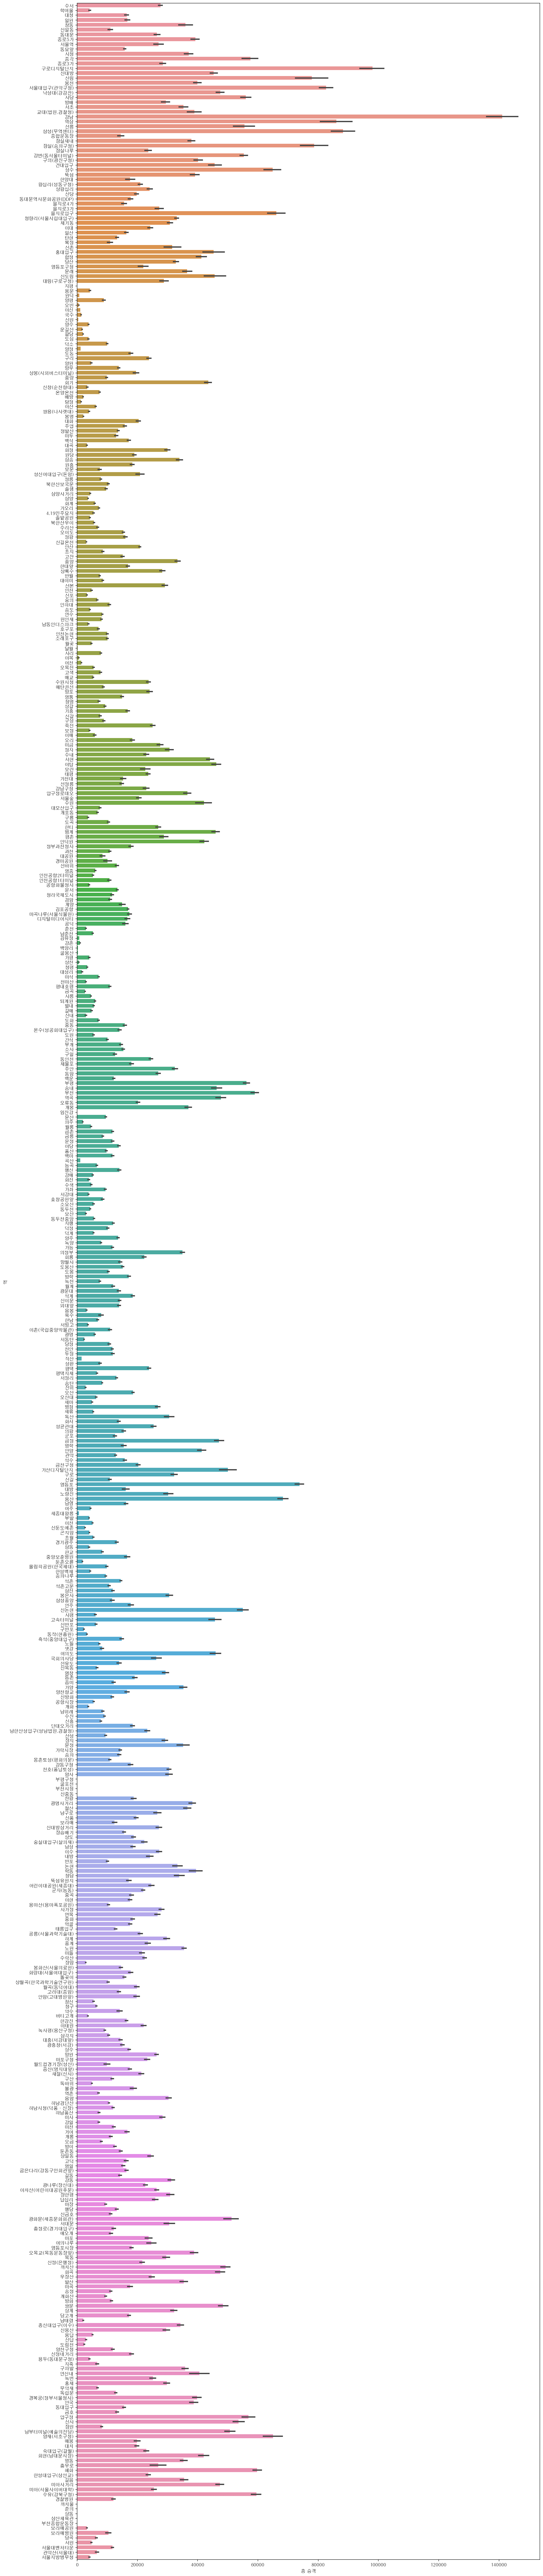

In [256]:
plt.subplots(figsize=(18, 100))
sns.barplot(data=df9, x="총 승객", y="역")
plt.show()

C:\Users\KB\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


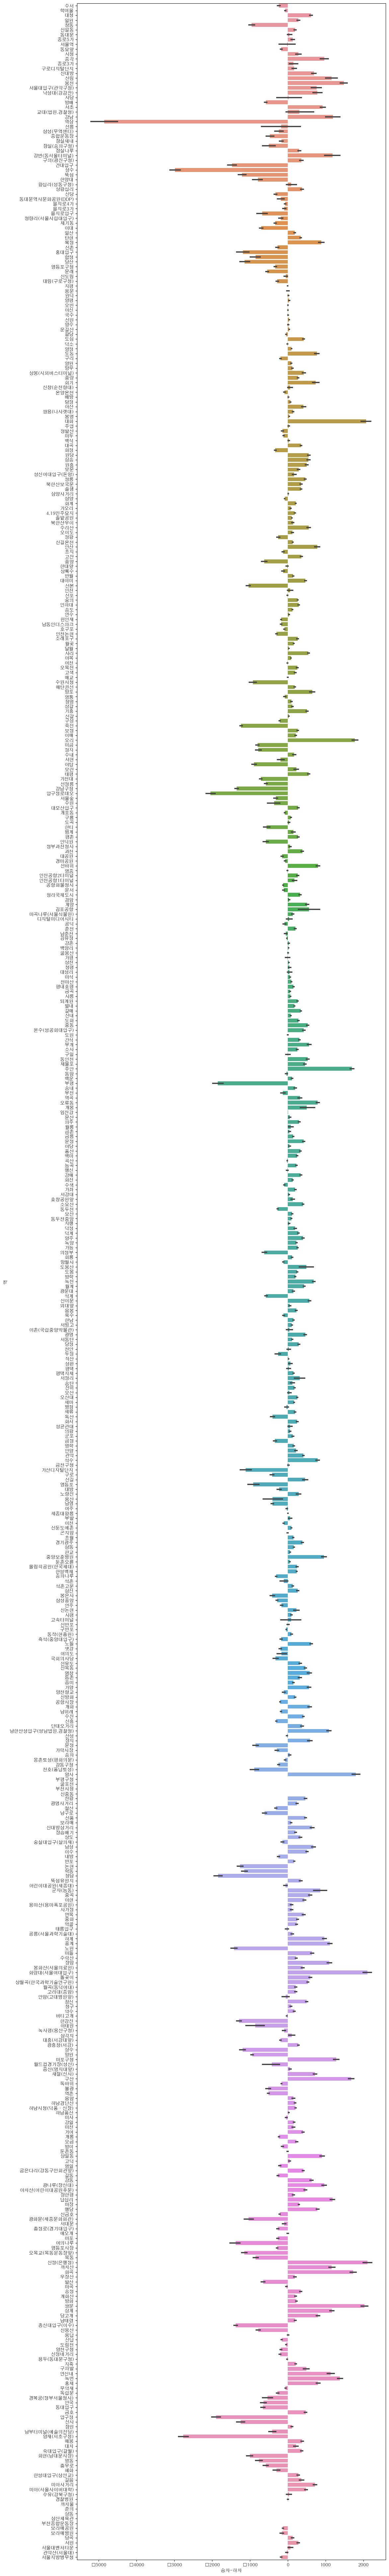

In [378]:
plt.subplots(figsize=(12, 100))
sns.barplot(data=df9, x="승차-하차", y="역")
plt.show()

### 역의 개수가 많은 관계로 상위 25개 역으로 분석한다

In [257]:
test1=df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).mean().sort_values(by="총 승객", ascending=False).head(50)

In [258]:
test2=df9[["역", "노선", "승차승객", "하차승객", "총 승객"]].groupby(["역"]).sum().sort_values(by="총 승객", ascending=False).head(50)

In [259]:
test1

,승차승객,하차승객,총 승객
역,,,
강남,71148.094650,69960.296296,141108.390947
구로디지털단지,49118.683128,48950.687243,98069.370370
삼성(무역센터),44035.452675,44269.156379,88304.609053
역삼,40589.000000,45437.427984,86026.427984
서울대입구(관악구청),41717.621399,40957.534979,82675.156379
잠실(송파구청),39116.341564,39618.804527,78735.146091
신림,39530.327434,38372.513274,77902.840708
영등포,36468.798354,37382.646091,73851.444444
용산,33998.316872,34400.786008,68399.102881


In [260]:
test2

,승차승객,하차승객,총 승객
역,,,
잠실(송파구청),19010542,19254739,38265281
강남,17288987,17000352,34289339
고속터미널,16712491,16651220,33363711
홍대입구,16095209,16956884,33052093
서울역,16402326,16425681,32828007
사당,13612957,13604198,27217155
선릉,13466324,13551353,27017677
신림,13400781,13008282,26409063
가산디지털단지,11904767,12446347,24351114


### 상위 역 별 그래프

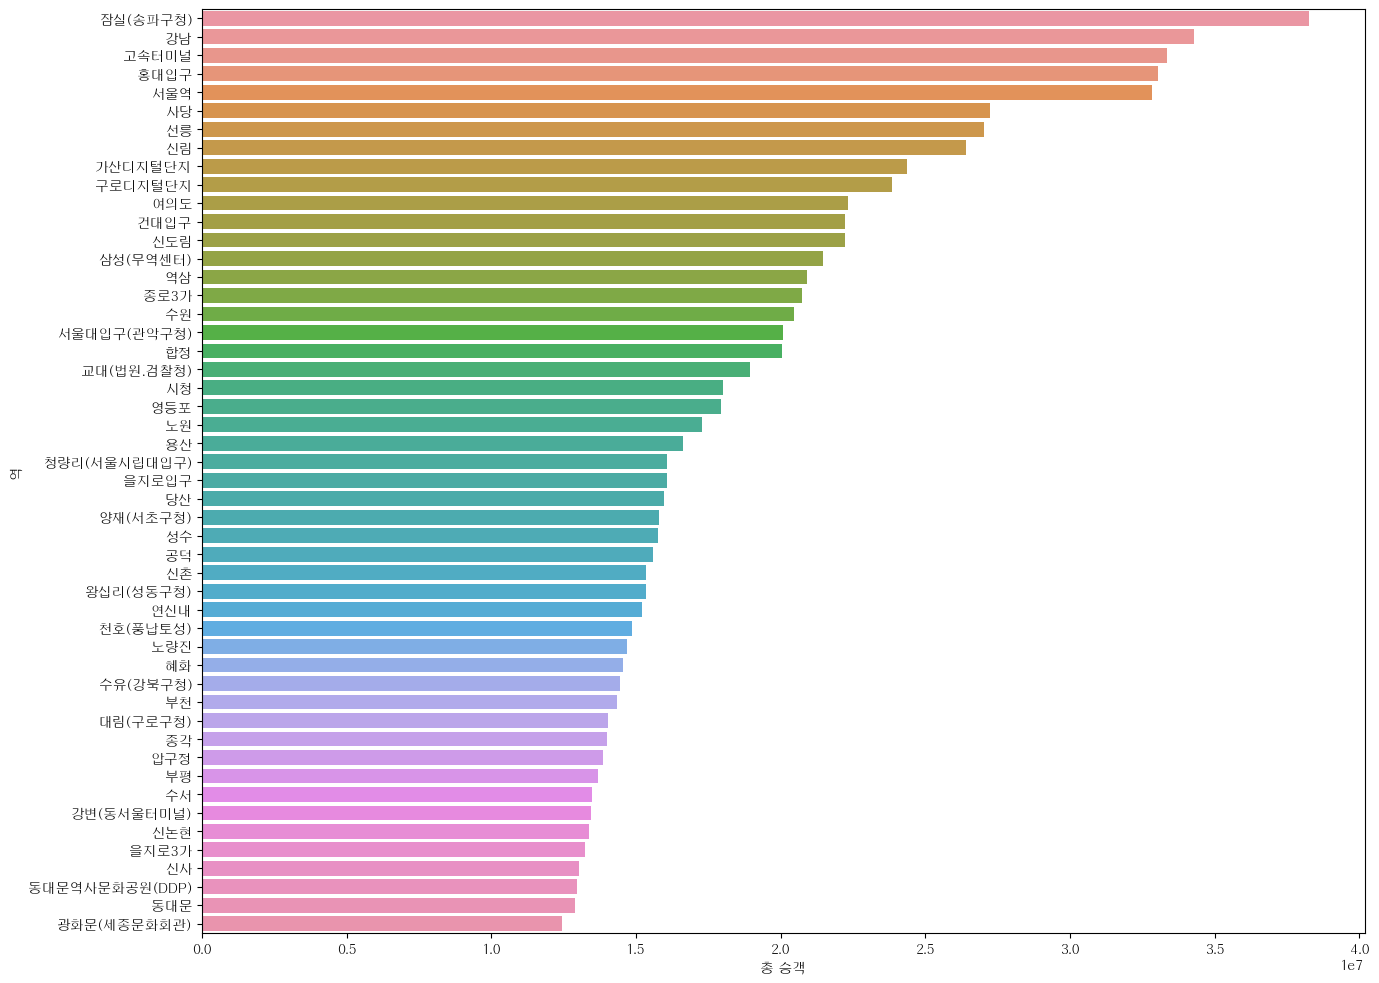

In [261]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test2, x="총 승객", y=test2.index)
plt.show()

In [262]:
test1.index

Index(['강남', '구로디지털단지', '삼성(무역센터)', '역삼', '서울대입구(관악구청)', '잠실(송파구청)', '신림',
       '영등포', '용산', '을지로입구', '양재(서초구청)', '성수', '혜화', '수유(강북구청)', '부천', '종각',
       '압구정', '부평', '사당', '선릉', '강변(동서울터미널)', '신논현', '신사', '광화문(세종문화회관)',
       '남부터미널(예술의전당)', '가산디지털단지', '까치산', '쌍문', '역곡', '화곡', '낙성대(강감찬)', '미아사거리',
       '금정', '송내', '야탑', '범계', '여의도', '고속터미널', '건대입구', '신도림', '신대방', '홍대입구',
       '서현', '회기', '인덕원', '수원', '회현(남대문시장)', '안양', '합정', '연신내'],
      dtype='object', name='역')

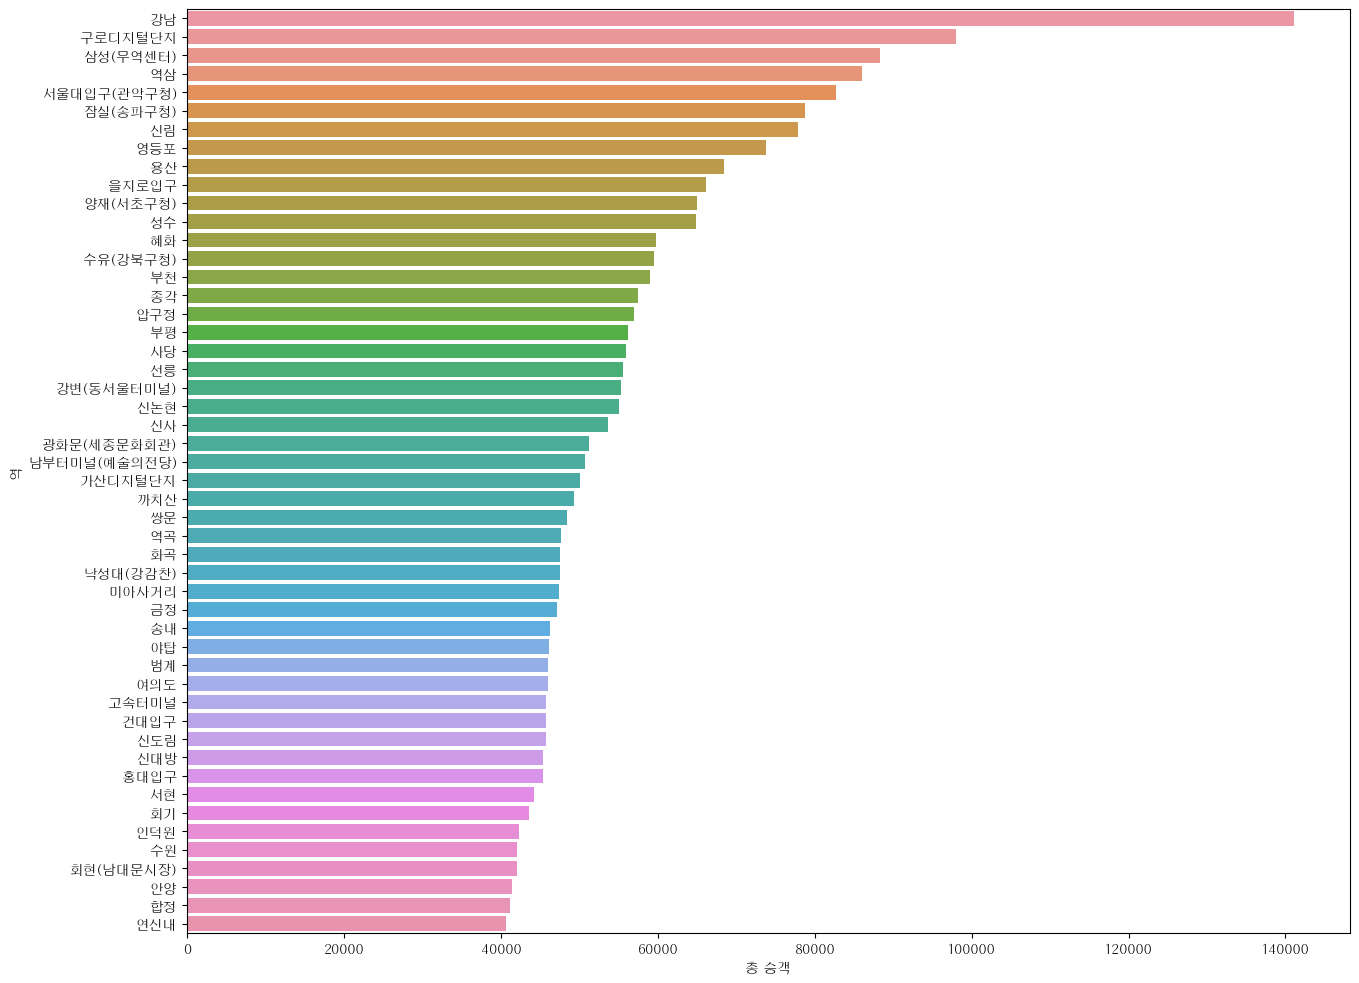

In [263]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test1, x="총 승객", y=test1.index)
plt.show()

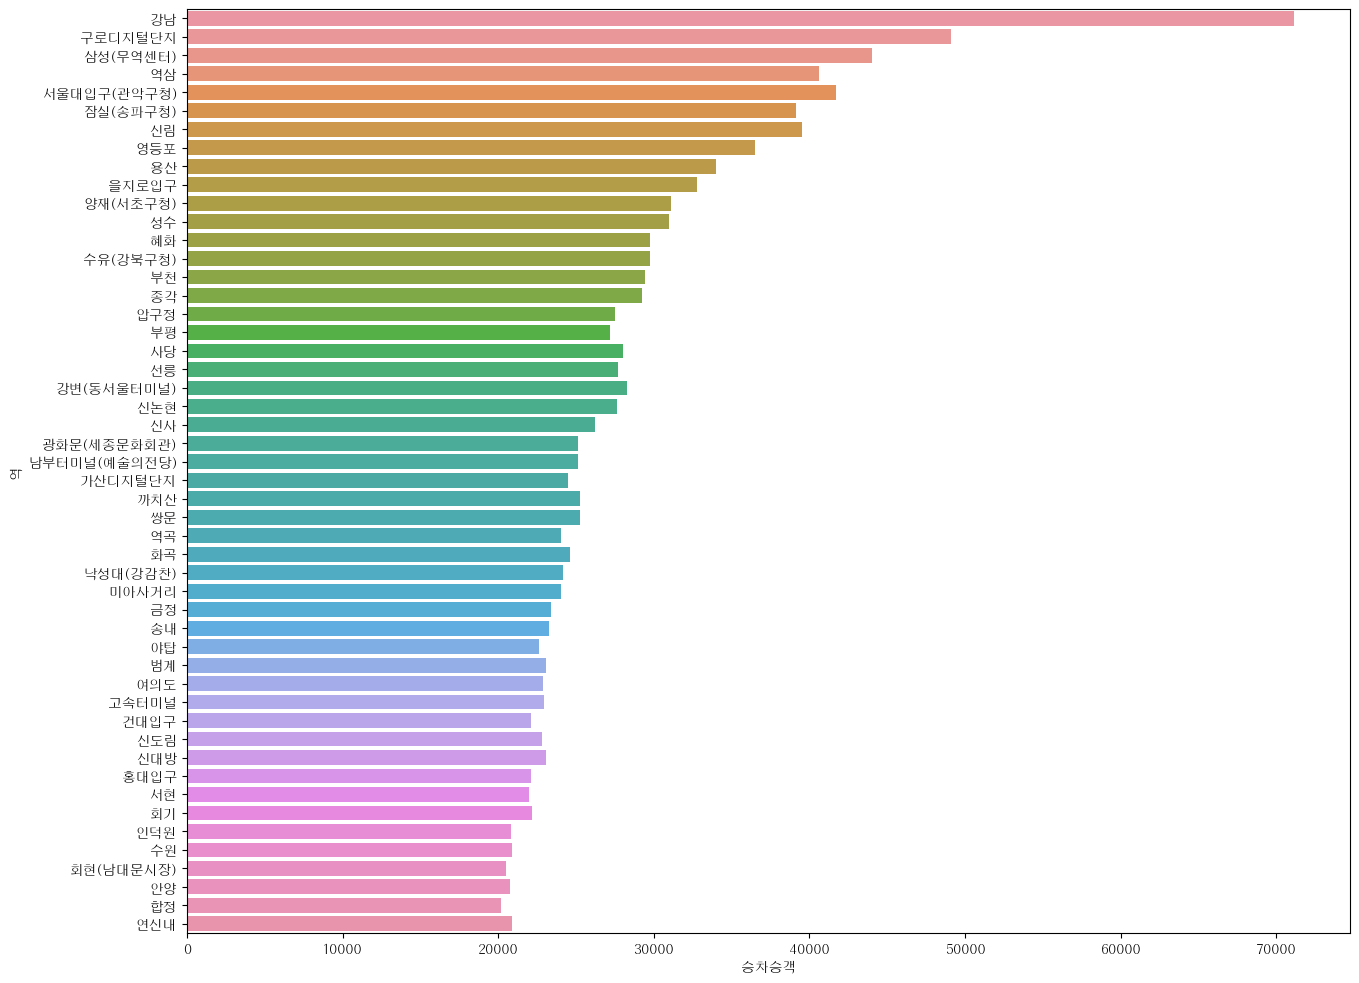

In [264]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test1, x="승차승객", y=test1.index)
plt.show()

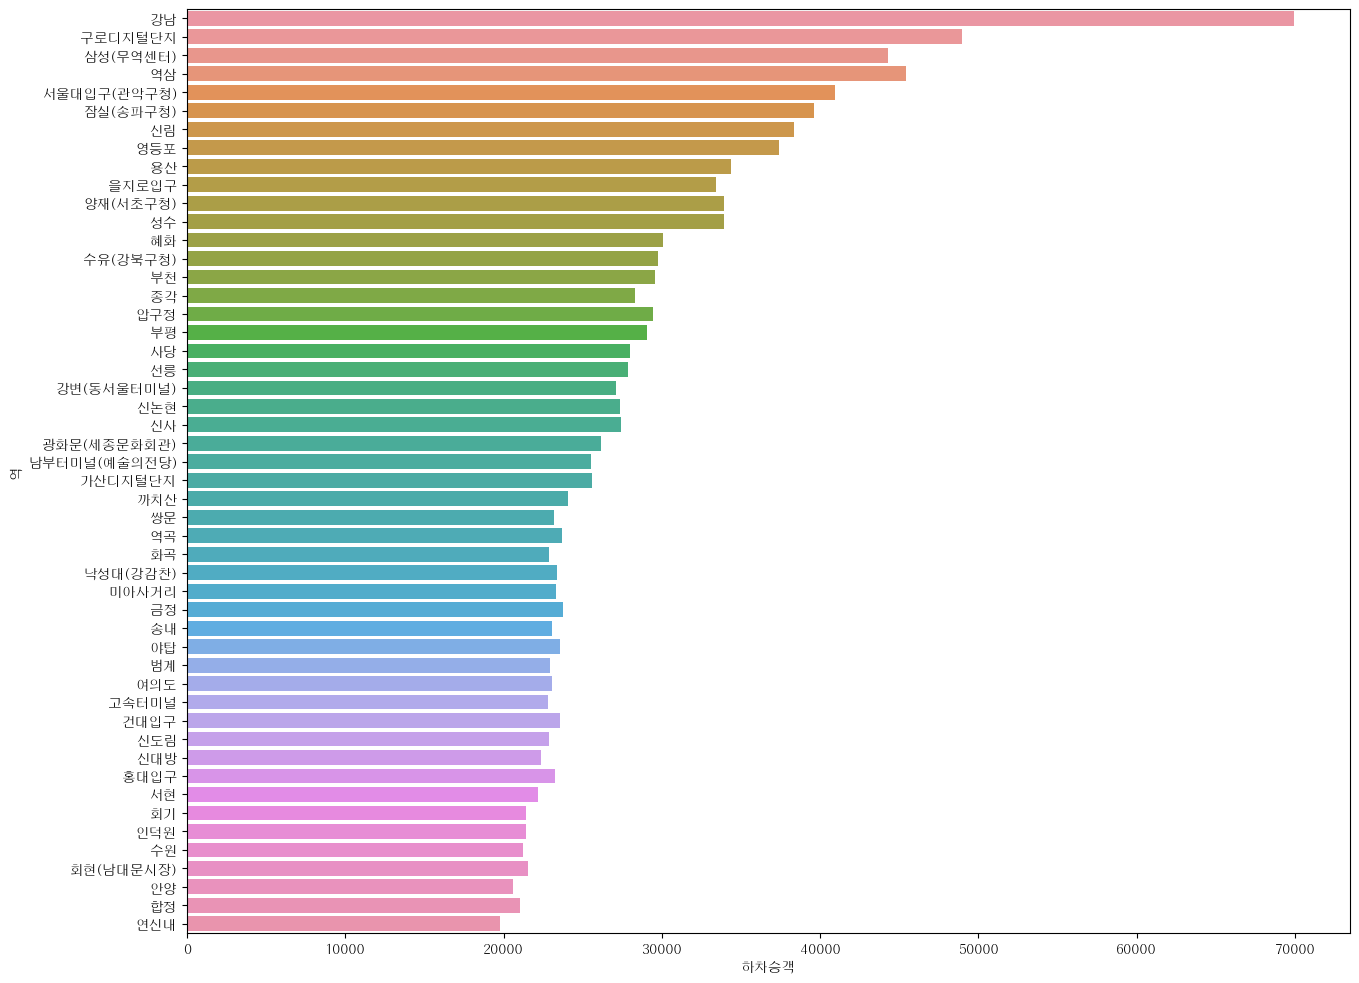

In [265]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test1, x="하차승객", y=test1.index)
plt.show()

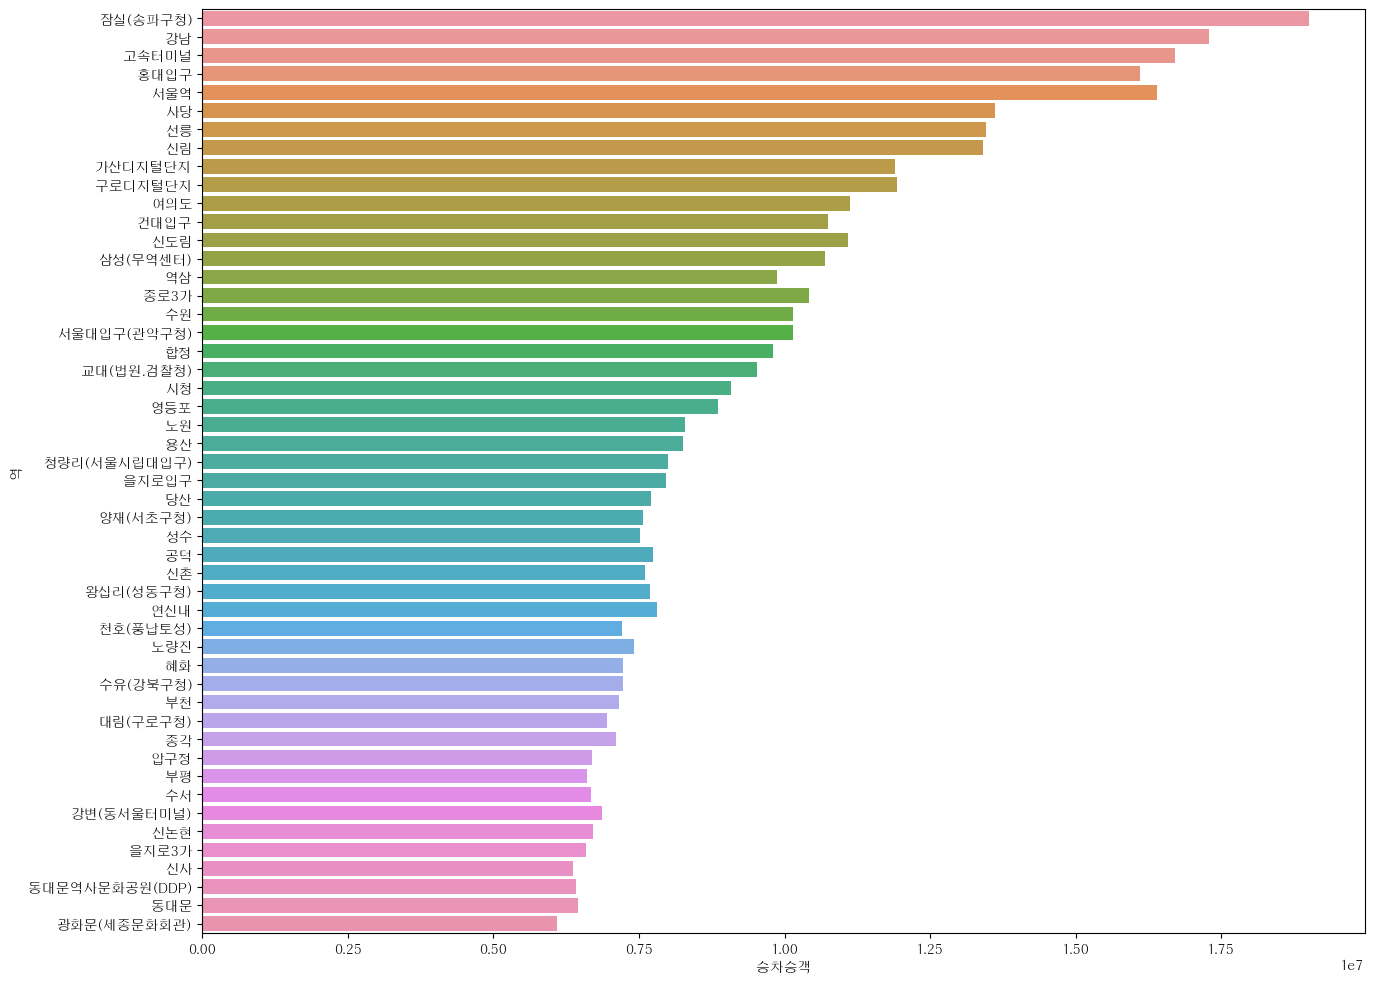

In [266]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test2, x="승차승객", y=test2.index)
plt.show()

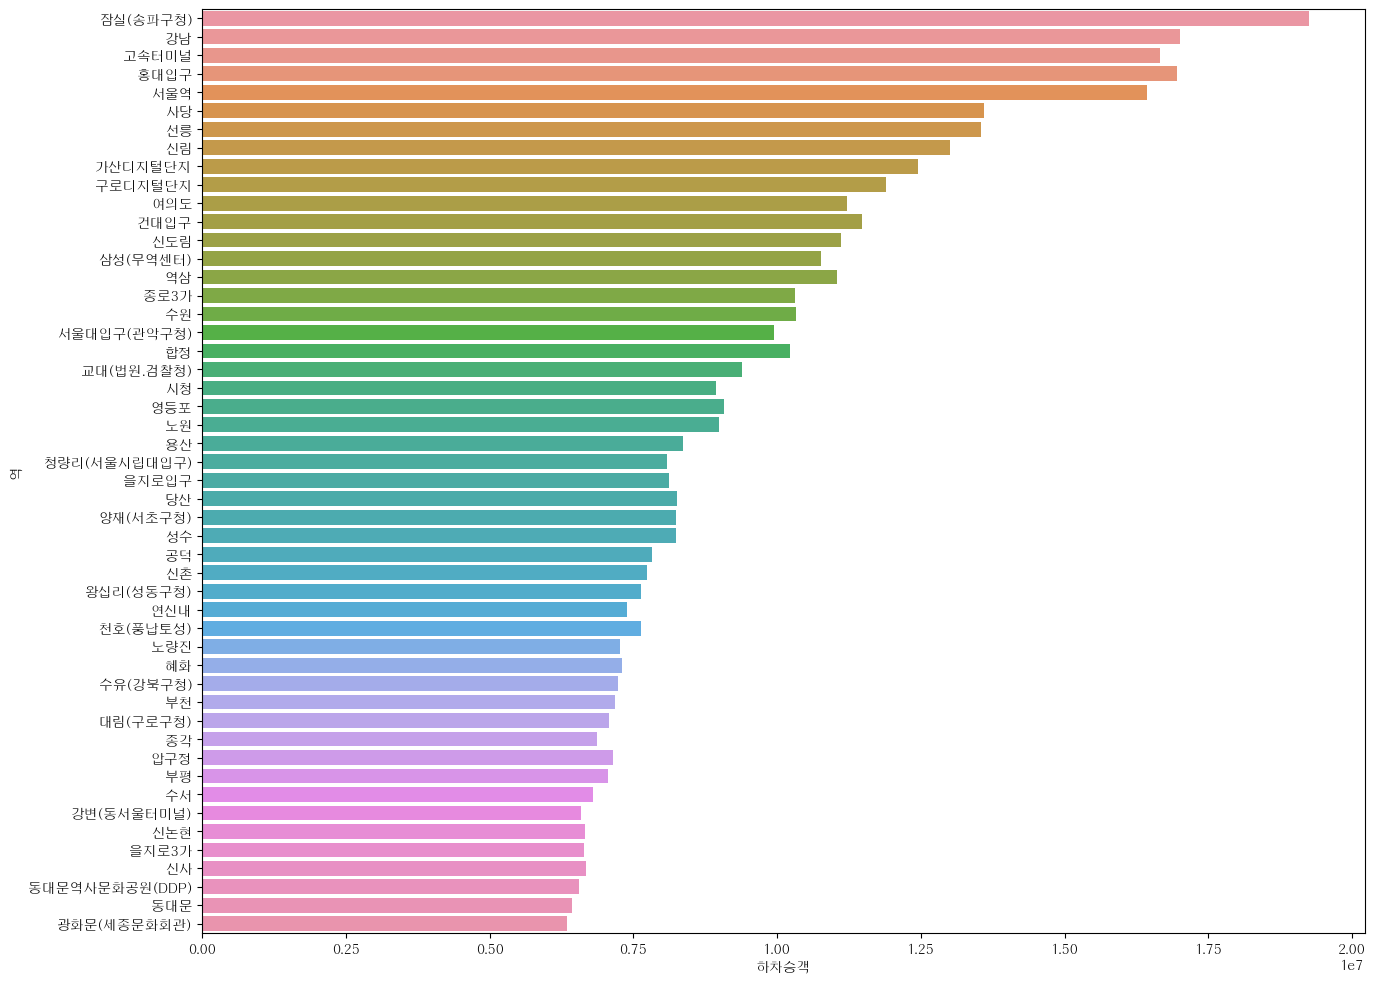

In [267]:
plt.subplots(figsize=(15, 12))
sns.barplot(data=test2, x="하차승객", y=test2.index)
plt.show()

### 그래프 확인
 - 평균값의 그래프보다 합의 그래프가 상대적으로 고르게 분포되어 있다

### 역별 승객 그래프

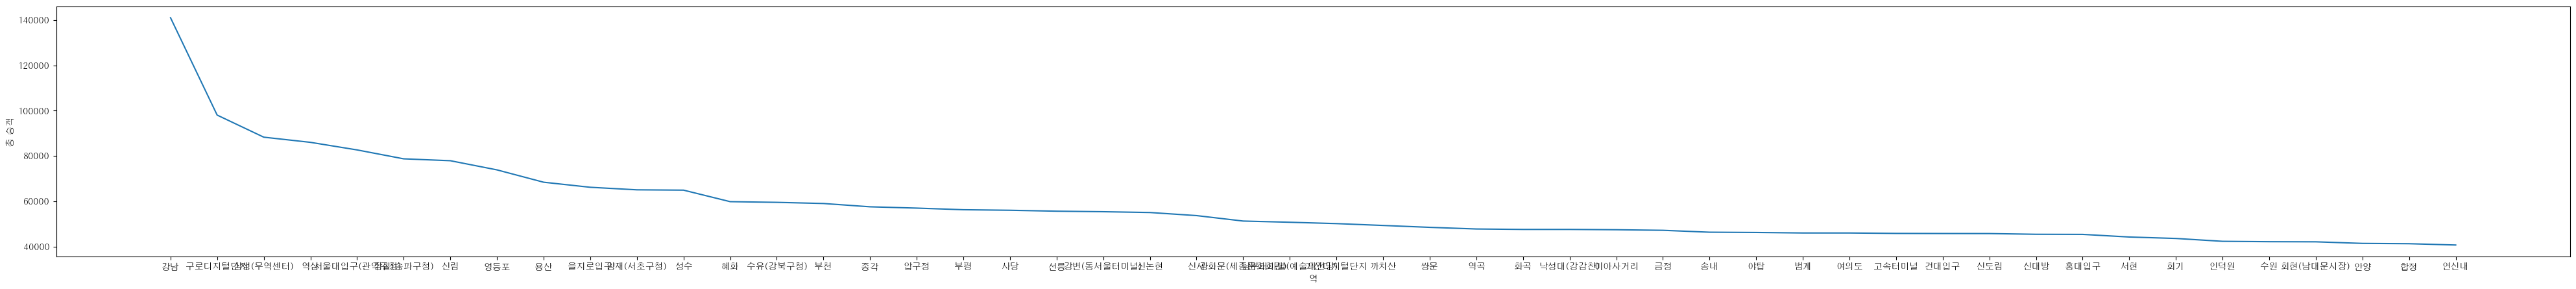

In [268]:
plt.subplots(figsize=(50, 5))
sns.lineplot(data=test1, x=test1.index, y="총 승객")
plt.show()

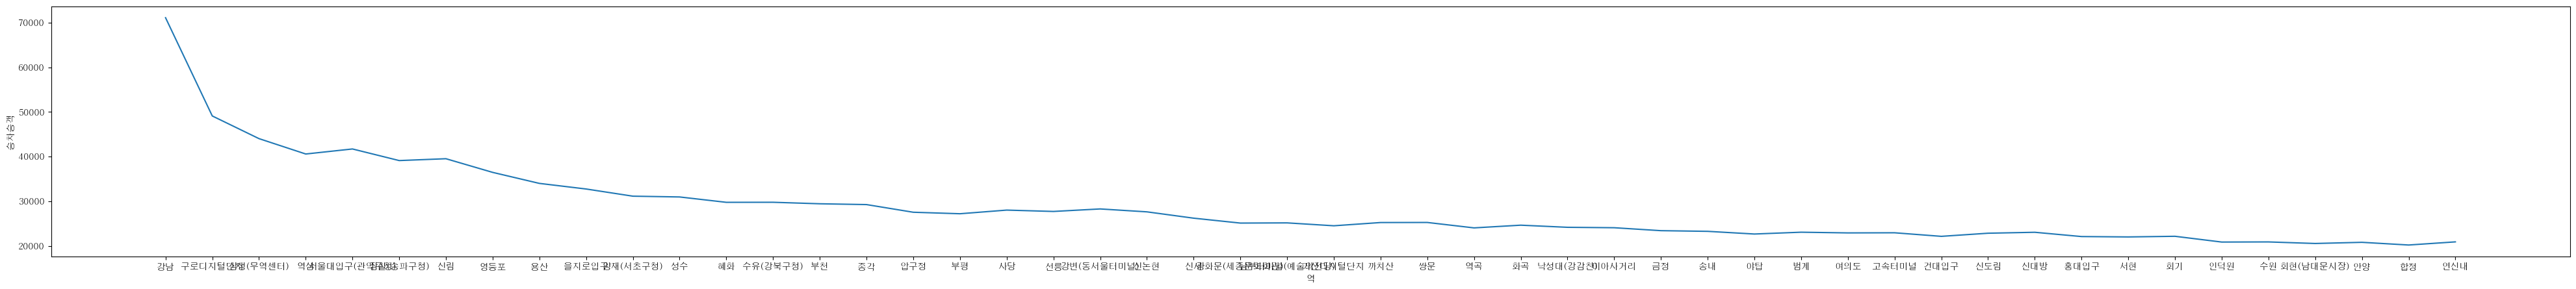

In [269]:
plt.subplots(figsize=(50, 5))
sns.lineplot(data=test1, x=test1.index, y="승차승객")
plt.show()

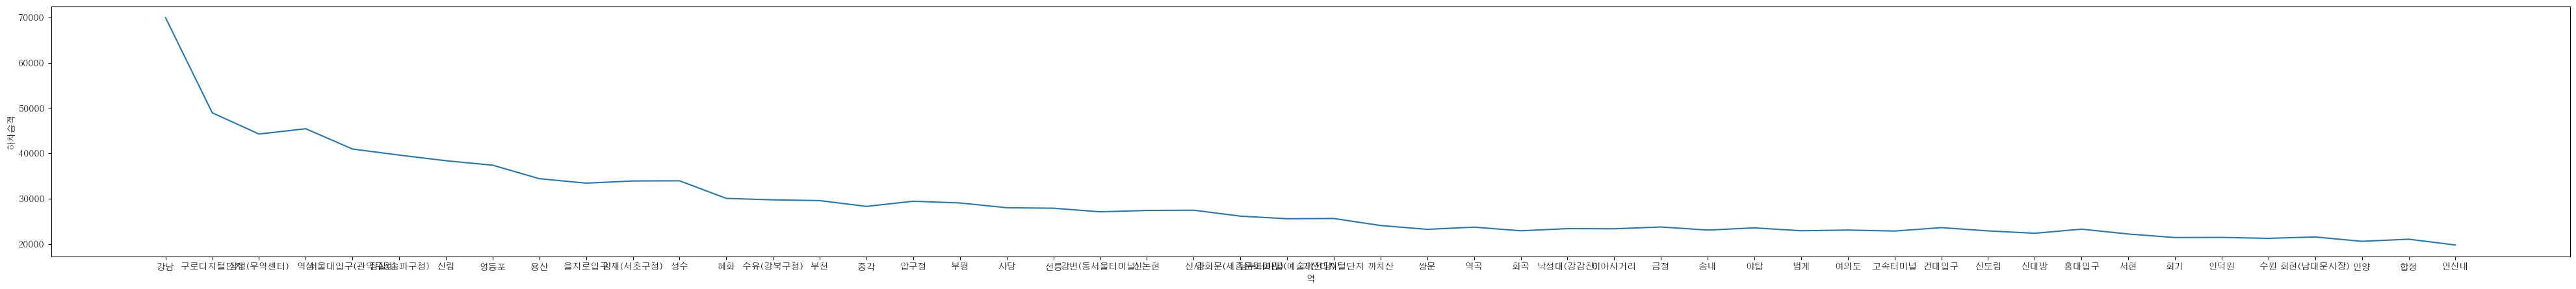

In [270]:
plt.subplots(figsize=(50, 5))
sns.lineplot(data=test1, x=test1.index, y="하차승객")
plt.show()

### 월별 총 승객 상위 역

#### 총 승객 상위 역 25곳 구하기

In [271]:
df9.groupby(["역"]).sum().sort_values(by="총 승객", ascending=False)[["총 승객"]].head(25)

,총 승객
역,
잠실(송파구청),38265281
강남,34289339
고속터미널,33363711
홍대입구,33052093
서울역,32828007
사당,27217155
선릉,27017677
신림,26409063
가산디지털단지,24351114


In [272]:
top25_station=df9.groupby(["역"]).sum().sort_values(by="총 승객", ascending=False)[["총 승객"]].head(25).index
top25_station

Index(['잠실(송파구청)', '강남', '고속터미널', '홍대입구', '서울역', '사당', '선릉', '신림', '가산디지털단지',
       '구로디지털단지', '여의도', '건대입구', '신도림', '삼성(무역센터)', '역삼', '종로3가', '수원',
       '서울대입구(관악구청)', '합정', '교대(법원.검찰청)', '시청', '영등포', '노원', '용산',
       '청량리(서울시립대입구)'],
      dtype='object', name='역')

In [273]:
top25_station_cond=df9["역"].isin(top25_station)
top25_station_cond

0         False
1         False
2         False
3         False
4         False
          ...  
145789    False
145790    False
145791    False
145792    False
145793    False
Name: 역, Length: 145794, dtype: bool

In [274]:
top25=df9[top25_station_cond]
top25

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
8,2022-01-01,1호선,서울역,18398,16926,35324,1472,1,1,토
10,2022-01-01,1호선,시청,5604,5006,10610,598,1,1,토
12,2022-01-01,1호선,종로3가,11017,9630,20647,1387,1,1,토
13,2022-01-01,2호선,구로디지털단지,18363,18352,36715,11,1,1,토
15,2022-01-01,2호선,신림,29564,29162,58726,402,1,1,토
...,...,...,...,...,...,...,...,...,...,...
145647,2022-08-31,공항철도 1호선,서울역,9501,8471,17972,1030,8,31,수
145649,2022-08-31,공항철도 1호선,홍대입구,11087,11545,22632,-458,8,31,수
145669,2022-08-31,분당선,선릉,14565,21822,36387,-7257,8,31,수
145676,2022-08-31,분당선,수원,8372,6897,15269,1475,8,31,수


#### 상위 역 25개가 속해있는 노선

In [275]:
top25.노선.unique()

array(['1호선', '2호선', '분당선', '공항철도 1호선', '경의선', '경원선', '경부선', '9호선', '8호선',
       '7호선', '6호선', '5호선', '4호선', '3호선', '신림선'], dtype=object)

In [276]:
top25.groupby("노선").sum().sort_values(by="총 승객", ascending=False)[["총 승객"]]

,총 승객
노선,
2호선,316925409
경부선,63131791
1호선,47405460
7호선,37742970
3호선,29010952
4호선,24845913
9호선,17801844
5호선,17150626
분당선,9838150


#### 상위 25개 역의 노선 중 상위 5개 노선 구하기

In [277]:
top25.groupby("노선").sum().sort_values(by="총 승객", ascending=False)[["총 승객"]].head(5)

,총 승객
노선,
2호선,316925409
경부선,63131791
1호선,47405460
7호선,37742970
3호선,29010952


In [278]:
top5_line=top25.groupby("노선").sum().sort_values(by="총 승객", ascending=False)[["총 승객"]].head(5).index
top5_line

Index(['2호선', '경부선', '1호선', '7호선', '3호선'], dtype='object', name='노선')

In [279]:
top5_line_cond=df9["노선"].isin(top5_line)
top5_line_cond

0          True
1          True
2          True
3          True
4         False
          ...  
145789    False
145790    False
145791    False
145792    False
145793    False
Name: 노선, Length: 145794, dtype: bool

#### 상위 25개 역과 상위 5개 노선 결합

In [280]:
top=df9[top25_station_cond & top5_line_cond]
top

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
8,2022-01-01,1호선,서울역,18398,16926,35324,1472,1,1,토
10,2022-01-01,1호선,시청,5604,5006,10610,598,1,1,토
12,2022-01-01,1호선,종로3가,11017,9630,20647,1387,1,1,토
13,2022-01-01,2호선,구로디지털단지,18363,18352,36715,11,1,1,토
15,2022-01-01,2호선,신림,29564,29162,58726,402,1,1,토
...,...,...,...,...,...,...,...,...,...,...
145516,2022-08-31,경부선,용산,36725,37759,74484,-1034,8,31,수
145519,2022-08-31,경부선,영등포,39567,40820,80387,-1253,8,31,수
145520,2022-08-31,경부선,신도림,4427,4459,8886,-32,8,31,수
145523,2022-08-31,경부선,가산디지털단지,19472,22678,42150,-3206,8,31,수


In [281]:
top.sort_values(by="총 승객", ascending=False)

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
58995,2022-04-09,2호선,잠실(송파구청),122543,118237,240780,4306,4,9,토
79176,2022-05-13,2호선,강남,95342,98137,193479,-2795,5,13,금
82888,2022-05-20,2호선,강남,95179,98286,193465,-3107,5,20,금
116915,2022-07-15,2호선,강남,96795,96558,193353,237,7,15,금
75064,2022-05-06,2호선,잠실(송파구청),97288,95576,192864,1712,5,6,금
...,...,...,...,...,...,...,...,...,...,...
17530,2022-01-30,경부선,신도림,1819,1505,3324,314,1,30,일
321,2022-01-01,경부선,신도림,1490,1275,2765,215,1,1,토
18953,2022-02-01,경부선,신도림,1359,1305,2664,54,2,1,화
18135,2022-01-31,경부선,신도림,1389,1182,2571,207,1,31,월


#### 상위 25개 역의 월별 총 승객 수

In [282]:
month_top=top.pivot_table(index="월", columns="역", values="총 승객")
month_top

역,가산디지털단지,강남,건대입구,고속터미널,교대(법원.검찰청),구로디지털단지,노원,사당,삼성(무역센터),서울대입구(관악구청),...,신도림,신림,역삼,영등포,용산,잠실(송파구청),종로3가,청량리(서울시립대입구),합정,홍대입구
월,,,,,,,,,,,,,,,,,,,,,
1,48587.887097,140046.612903,42505.016129,50003.500000,36280.290323,93925.548387,33571.741935,63003.032258,82130.193548,77890.774194,...,42397.064516,104728.838710,83323.193548,68113.580645,60289.096774,118075.064516,28721.354839,34754.451613,54227.387097,101347.000000
2,45137.178571,128262.821429,39300.339286,46510.428571,33944.125000,87935.321429,31988.214286,59107.535714,75705.107143,74208.500000,...,40164.214286,100276.642857,76228.964286,63825.571429,55460.714286,106530.785714,27030.732143,31312.250000,50520.964286,94077.392857
3,46057.193548,125027.064516,41509.935484,44173.854839,34828.935484,88651.774194,32111.612903,60258.838710,74310.580645,77404.419355,...,40642.741935,101544.548387,75427.096774,63353.064516,53824.258065,104659.451613,27170.209677,32864.451613,51123.258065,94844.870968
4,51919.583333,143798.800000,48362.050000,54316.583333,40238.100000,99938.433333,35636.066667,72240.700000,85671.600000,86670.966667,...,47584.216667,113709.066667,85905.433333,74133.333333,65033.300000,144153.466667,31839.983333,37461.766667,59880.200000,109695.300000
5,53113.741935,151591.322581,51905.419355,61968.387097,42570.548387,104746.419355,38403.483871,78781.322581,92969.419355,90625.870968,...,50523.854839,118474.645161,90154.451613,81111.064516,77505.032258,140976.548387,34367.887097,39901.612903,64149.322581,125208.387097
6,52802.100000,146197.533333,48429.233333,59985.483333,42181.850000,104675.600000,37535.033333,78253.333333,97120.600000,86271.100000,...,49713.733333,109221.700000,92652.266667,80753.166667,77450.766667,135699.666667,33785.016667,38321.166667,62537.200000,119819.166667
7,52252.951613,152091.838710,47790.838710,60341.677419,41294.903226,103647.580645,38293.774194,75767.193548,102367.838710,85625.129032,...,48029.677419,107071.290323,92616.935484,81603.806452,79784.451613,143558.129032,33087.290323,37146.838710,62996.161290,126913.225806
8,50635.500000,140858.967742,45542.370968,57392.709677,39749.935484,100326.967742,36570.838710,71206.774194,95141.677419,82130.032258,...,46219.709677,102630.612903,91164.774194,77179.451613,76776.516129,135477.483871,31275.645161,36266.193548,60904.612903,120815.677419


<AxesSubplot:xlabel='역', ylabel='월'>

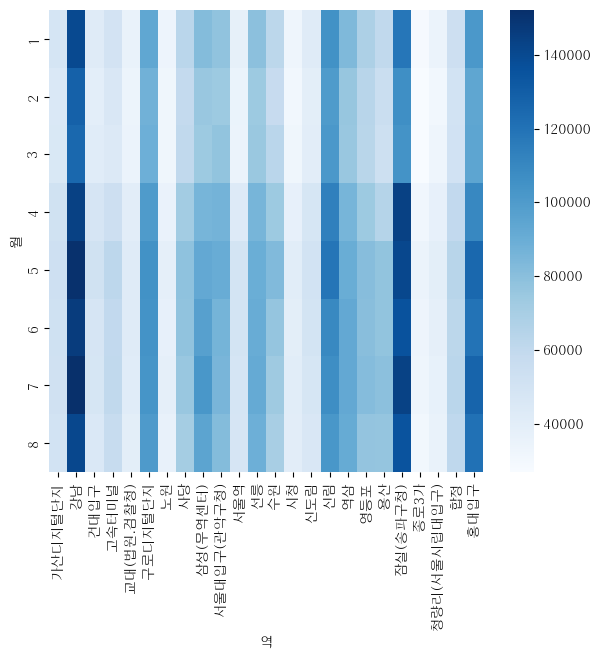

In [283]:
plt.subplots(figsize=(7, 6))
sns.heatmap(month_top, cmap='Blues')

### 결과확인
 - 강남과 잠실(송파구청)역의 총 승객이 눈에 띄게 많다는 것을 알 수 있다
 - 교대(법원,검찰청)역과 노원역, 시청역, 종로3가, 청량리(서울시립대입구)역은 상대적으로 승객이 적은 것을 알 수 있다
 - 25곳의 역 모두 2~3월 승객의 수가 적고, 5월과 7월이 승객의 수가 많다는 것을 알 수 있다

### 상위역 월별 히트맵
 - 1월, 5월

In [364]:
top_jan=top[top['월']==1]
top_jan

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
8,2022-01-01,1호선,서울역,18398,16926,35324,1472,1,1,토
10,2022-01-01,1호선,시청,5604,5006,10610,598,1,1,토
12,2022-01-01,1호선,종로3가,11017,9630,20647,1387,1,1,토
13,2022-01-01,2호선,구로디지털단지,18363,18352,36715,11,1,1,토
15,2022-01-01,2호선,신림,29564,29162,58726,402,1,1,토
...,...,...,...,...,...,...,...,...,...,...
18455,2022-01-31,2호선,시청,2790,2247,5037,543,1,31,월
18456,2022-01-31,1호선,청량리(서울시립대입구),9670,10051,19721,-381,1,31,월
18460,2022-01-31,1호선,종로3가,8629,7556,16185,1073,1,31,월
18463,2022-01-31,1호선,서울역,15649,16857,32506,-1208,1,31,월


In [366]:
top_jan_day_station=top_jan.pivot_table("총 승객", index="일", columns="역")
top_jan_day_station

역,가산디지털단지,강남,건대입구,고속터미널,교대(법원.검찰청),구로디지털단지,노원,사당,삼성(무역센터),서울대입구(관악구청),...,신도림,신림,역삼,영등포,용산,잠실(송파구청),종로3가,청량리(서울시립대입구),합정,홍대입구
일,,,,,,,,,,,,,,,,,,,,,
1,12830.5,51177.0,28784.0,27172.0,8981.5,36715.0,16039.0,31465.0,28940.0,40457.0,...,19785.0,58726.0,16763.0,48668.0,44739.0,69073.0,13931.0,18953.0,28833.0,77280.0
2,13335.5,56459.0,30579.0,44759.0,11480.5,39697.0,20556.0,35262.0,33753.0,44879.0,...,23179.5,63571.0,19244.0,57543.0,55619.0,80671.0,14186.0,21535.0,33012.0,79273.0
3,66208.5,162691.0,44122.5,47910.5,42938.5,116038.0,37957.0,67001.0,98743.0,84715.0,...,46818.5,116288.0,108480.0,68321.0,60305.0,122443.0,32016.0,35660.0,55966.0,94360.0
4,67297.0,168327.0,45261.5,47970.0,45392.5,118288.0,38992.0,70858.0,101642.0,86343.0,...,48482.5,119403.0,113953.0,68903.0,59476.0,128799.0,33306.5,37081.0,59095.0,99248.0
5,67006.0,167770.0,46036.5,49019.0,45751.5,118788.0,38558.0,72149.0,102814.0,90705.0,...,48731.5,120576.0,114017.0,70322.0,62057.0,128817.0,33875.5,36228.0,59783.0,101373.0
6,67577.0,171091.0,46572.0,50033.5,46337.0,119682.0,38866.0,73455.0,103948.0,91079.0,...,49530.5,121960.0,113849.0,71798.0,61868.0,133333.0,34540.5,37775.0,61474.0,106384.0
7,66090.0,179869.0,49821.0,57938.5,47449.5,120694.0,41056.0,76290.0,104412.0,94883.0,...,51481.5,124794.0,111164.0,79115.0,70405.0,138936.0,35833.0,39852.0,64905.0,116935.0
8,19640.5,120295.0,44211.0,54615.0,21903.0,64310.0,30879.0,59423.0,55698.0,71061.0,...,39788.0,93180.0,38113.0,75816.0,61982.0,119113.0,26730.0,33718.0,54505.0,121466.0
9,13789.5,66224.0,31961.0,42552.0,13031.0,43462.0,20800.0,40779.0,39563.0,51201.0,...,27273.0,67793.0,23125.0,58914.0,51437.0,86382.0,15796.5,23296.0,39201.0,90903.0


<AxesSubplot:xlabel='역', ylabel='일'>

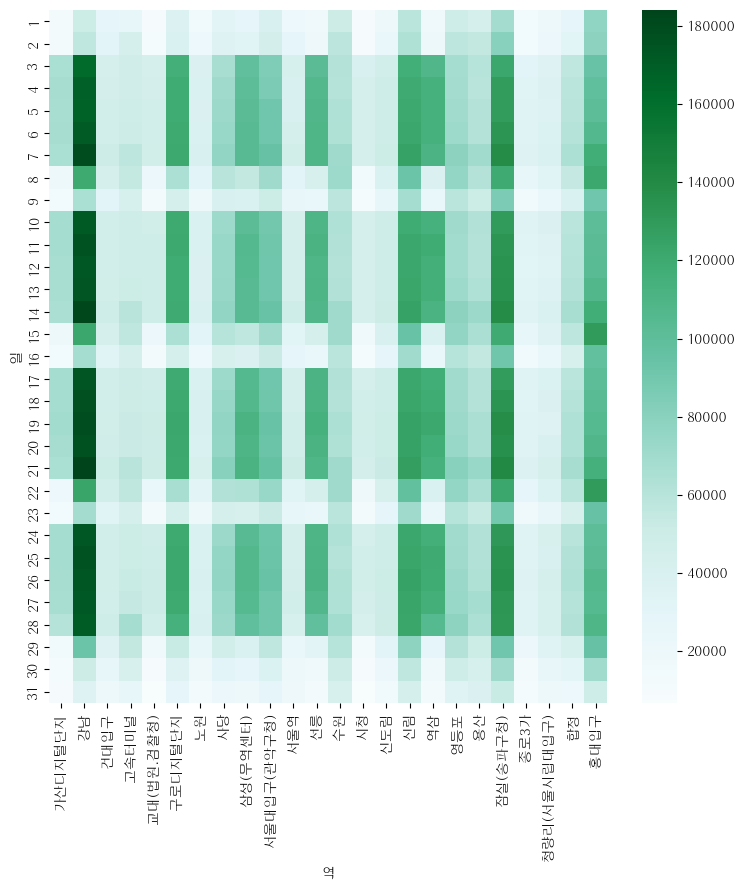

In [369]:
plt.subplots(figsize=(9, 9))
sns.heatmap(top_jan_day_station ,cmap="BuGn")

In [370]:
top_may=top[top['월']==5]
top_may

,날짜,노선,역,승차승객,하차승객,총 승객,승차-하차,월,일,요일
71556,2022-05-01,7호선,가산디지털단지,11663,10814,22477,849,5,1,일
71628,2022-05-01,경부선,서울역,9183,2158,11341,7025,5,1,일
71630,2022-05-01,경부선,용산,35900,32868,68768,3032,5,1,일
71633,2022-05-01,경부선,영등포,35422,34223,69645,1199,5,1,일
71634,2022-05-01,경부선,신도림,2488,2622,5110,-134,5,1,일
...,...,...,...,...,...,...,...,...,...,...
89995,2022-05-31,1호선,청량리(서울시립대입구),22705,22452,45157,253,5,31,화
90000,2022-05-31,1호선,종로3가,28428,25876,54304,2552,5,31,화
90002,2022-05-31,1호선,시청,26014,26307,52321,-293,5,31,화
90003,2022-05-31,1호선,서울역,49864,48244,98108,1620,5,31,화


In [371]:
top_may_day_station=top_may.pivot_table("총 승객", index="일", columns="역")
top_may_day_station

역,가산디지털단지,강남,건대입구,고속터미널,교대(법원.검찰청),구로디지털단지,노원,사당,삼성(무역센터),서울대입구(관악구청),...,신도림,신림,역삼,영등포,용산,잠실(송파구청),종로3가,청량리(서울시립대입구),합정,홍대입구
일,,,,,,,,,,,,,,,,,,,,,
1,17503.5,74625.0,41879.5,58624.0,15613.0,50241.0,23720.0,50551.0,43152.0,59935.0,...,32533.0,79264.0,24099.0,69645.0,68768.0,114182.0,22636.5,28637.0,47700.0,113799.0
2,69152.5,170688.0,51428.5,55008.0,50264.5,124892.0,40561.0,79498.0,106598.0,98981.0,...,53617.0,127226.0,117927.0,75531.0,67054.0,137228.0,35026.0,41595.0,62015.0,110137.0
3,69714.5,177795.0,53600.5,55260.5,52654.5,127854.0,42144.0,84681.0,110503.0,101450.0,...,56045.0,130148.0,120949.0,78391.0,67772.0,149559.0,36639.0,42822.0,65686.0,117913.0
4,71176.0,189056.0,61084.0,69917.0,53849.0,130862.0,45780.0,91333.0,115910.0,105516.0,...,60534.0,137574.0,120644.0,90085.0,88165.0,178162.0,39553.0,44453.0,72294.0,137312.0
5,19623.5,84176.0,51127.0,60983.5,17160.5,57360.0,30270.0,54477.0,47734.0,66796.0,...,36325.0,88065.0,26720.0,77072.0,79493.0,124618.0,28078.5,34660.0,56793.0,152416.0
6,51922.0,169715.0,59151.0,74760.5,45117.5,106968.0,45642.0,80184.0,92122.0,95996.0,...,52723.0,125818.0,88442.0,91265.0,91656.0,192864.0,38902.5,43001.0,72697.0,158850.0
7,21195.5,116060.0,50139.0,71860.0,23363.0,64669.0,33636.0,63011.0,56118.0,71302.0,...,41331.5,97288.0,34777.0,83684.0,86276.0,134334.0,28705.5,37030.0,58620.0,143924.0
8,15930.0,60181.0,34688.0,62431.0,13761.0,46512.0,23294.0,43149.0,40291.0,53952.0,...,29876.0,74909.0,22462.0,66010.0,71560.0,93258.0,17045.5,26094.0,37971.0,91754.0
9,69396.0,170284.0,51496.5,57928.0,50903.5,123688.0,41579.0,80869.0,105062.0,98925.0,...,53264.5,128578.0,117815.0,77287.0,75132.0,139109.0,36052.5,41097.0,62874.0,111222.0


<AxesSubplot:xlabel='역', ylabel='일'>

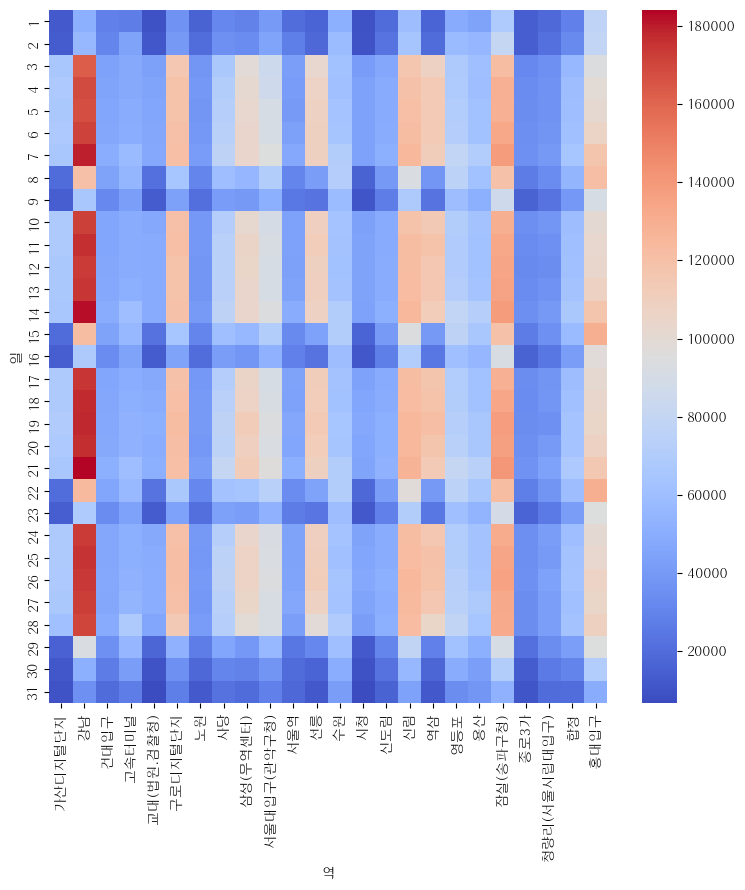

In [376]:
plt.subplots(figsize=(9, 9))
sns.heatmap(top_jan_day_station ,cmap="coolwarm")

### 결과
#### 1월
 - 주중이 색상이 진하게 표시되며, 주말일수록 색상이 연하다
 - 주중은 승객이 많고, 주말은 승객이 적다는 것을 직관적으로 표현하고 있다
 - 다만, 강남과 잠심(송파구청)은 주말이어도 승객이 많다는 것을 알 수 있다
 - 29~31일이 색상이 연한 것은 설 연휴와 주말이 겹친 영향으로 볼 수 있다
 - 홍대입구는 전반적으로 승객의 분포가 고르다는 것을 알 수 있다
#### 5월
 - 주중이 색상이 진하며, 주말일수록 색상이 연하다
 - 주중에 승객이 많고, 주말에 적다
 - 다만, 5월은 전체적으로 화~토요일에 승객이 많고, 일요일과 월요일 승객이 적다
 - 홍대입구는 전반적으로 승객의 분포가 고르다는 것을 알 수 있다

### 노선별 역의 승객 데이터
 - 1호선~ 6호선까지만

#### 1호선

In [303]:
line1=df9[df9.노선=="1호선"].groupby(["역"]).mean()
line1

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
동대문,10240.230453,9734.053498,19974.283951,506.176955,4.526749,15.703704
동묘앞,8443.666667,8757.707819,17201.374486,-314.041152,4.526749,15.703704
서울역,39586.860082,38310.020576,77896.880658,1276.839506,4.526749,15.703704
시청,18706.934156,18949.102881,37656.037037,-242.168724,4.526749,15.703704
신설동,11883.123457,11528.753086,23411.876543,354.370370,4.526749,15.703704
제기동,15259.897119,15594.275720,30854.172840,-334.378601,4.526749,15.703704
종각,29246.827160,28284.251029,57531.078189,962.576132,4.526749,15.703704
종로3가,22701.884774,20783.423868,43485.308642,1918.460905,4.526749,15.703704
종로5가,19691.390947,19559.423868,39250.814815,131.967078,4.526749,15.703704


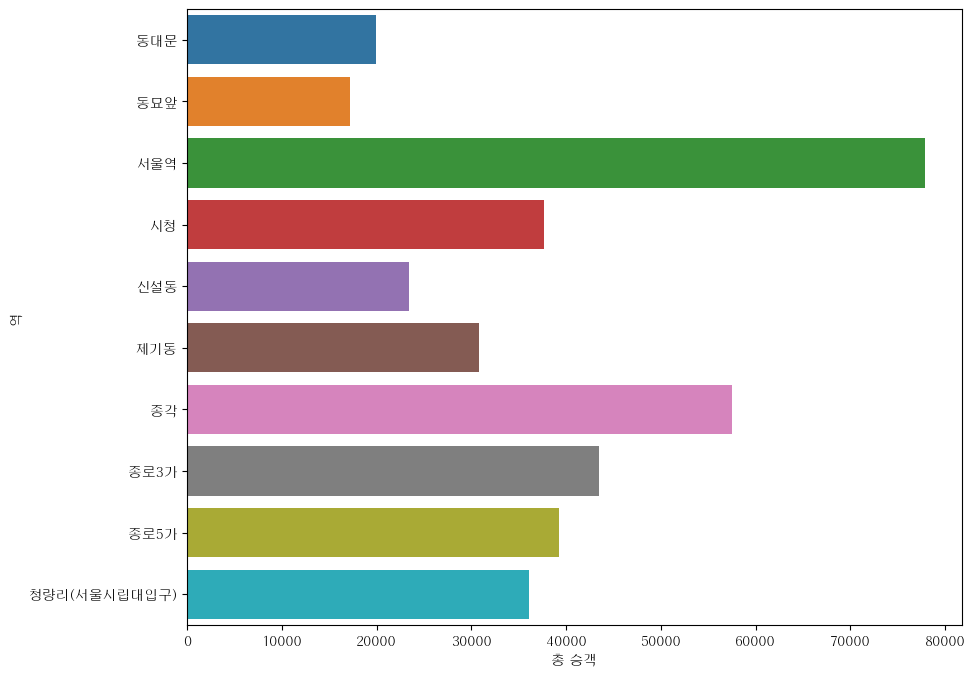

In [307]:
plt.subplots(figsize=(10, 8))
sns.barplot(data=line1, x="총 승객", y=line1.index)
plt.show()

#### 2호선

In [308]:
line2=df9[df9.노선=="2호선"].groupby(["역"]).mean()
line2

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
강남,71148.094650,69960.296296,141108.390947,1187.798354,4.526749,15.703704
강변(동서울터미널),28270.209877,27090.316872,55360.526749,1179.893004,4.526749,15.703704
건대입구,32823.765432,35220.004115,68043.769547,-2396.238683,4.526749,15.703704
교대(법원.검찰청),27529.218107,31054.123457,58583.341564,-3524.905350,4.526749,15.703704
구로디지털단지,49118.683128,48950.687243,98069.370370,167.995885,4.526749,15.703704
구의(광진구청),20288.543210,19932.288066,40220.831276,356.255144,4.526749,15.703704
낙성대(강감찬),24153.679012,23374.938272,47528.617284,778.740741,4.526749,15.703704
당산,15721.794239,18072.069959,33793.864198,-2350.275720,4.526749,15.703704
대림(구로구청),21100.485597,21620.670782,42721.156379,-520.185185,4.526749,15.703704


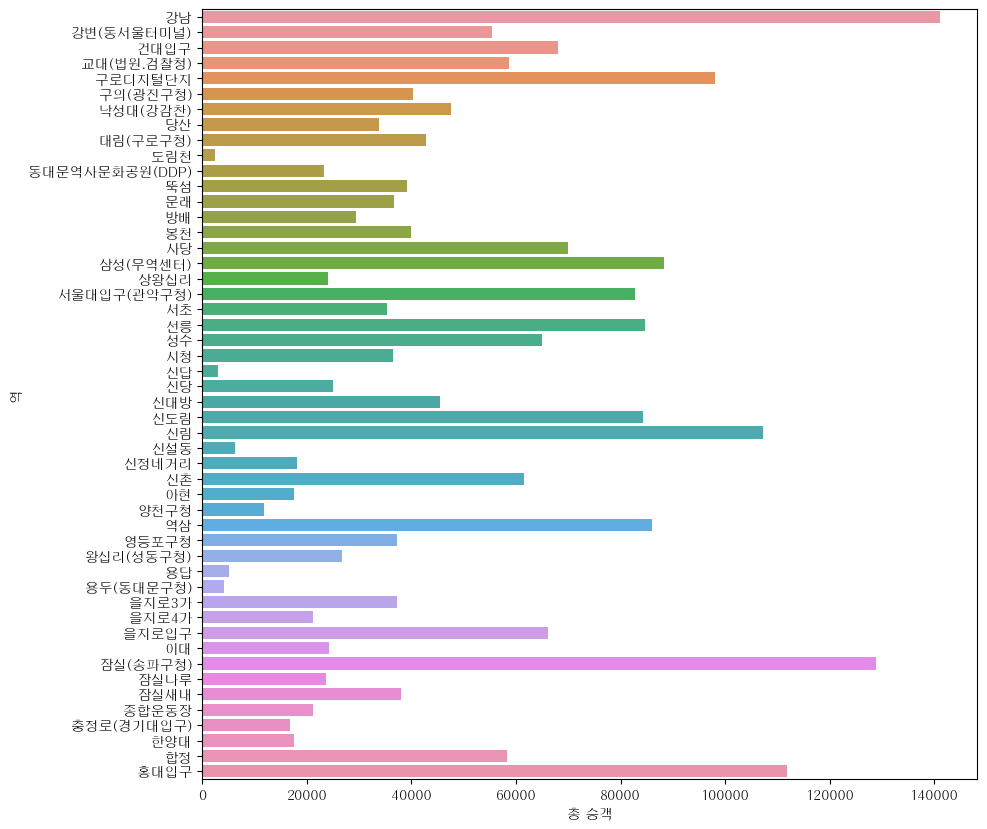

In [321]:
plt.subplots(figsize=(10, 10))
sns.barplot(data=line2, x="총 승객", y=line2.index)
plt.show()

#### 3호선

In [310]:
line3=df9[df9.노선=="3호선"].groupby(["역"]).mean()
line3

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
가락시장,7603.020576,7457.625514,15060.646091,145.395062,4.526749,15.703704
경복궁(정부서울청사),19650.312757,20183.370370,39833.683128,-533.057613,4.526749,15.703704
경찰병원,6046.781893,6041.469136,12088.251029,5.312757,4.526749,15.703704
고속터미널,41409.440329,40305.913580,81715.353909,1103.526749,4.526749,15.703704
교대(법원.검찰청),11705.255144,7567.345679,19272.600823,4137.909465,4.526749,15.703704
구파발,18191.341564,17705.065844,35896.407407,486.275720,4.526749,15.703704
금호,6895.213992,6423.172840,13318.386831,472.041152,4.526749,15.703704
남부터미널(예술의전당),25144.246914,25557.144033,50701.390947,-412.897119,4.526749,15.703704
녹번,13279.724280,11900.888889,25180.613169,1378.835391,4.526749,15.703704


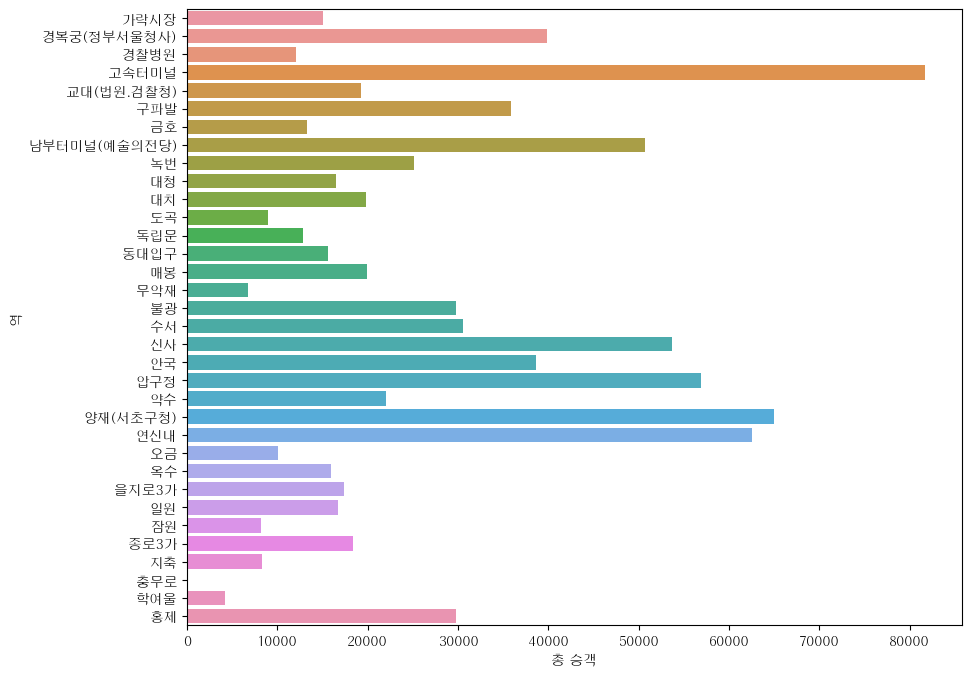

In [311]:
plt.subplots(figsize=(10, 8))
sns.barplot(data=line3, x="총 승객", y=line3.index)
plt.show()

#### 4호선

In [312]:
line4=df9[df9.노선=="4호선"].groupby(["역"]).mean()
line4

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
길음,17950.238683,17592.065844,35542.304527,358.172840,4.526749,15.703704
남태령,1130.716049,937.275720,2067.991770,193.440329,4.526749,15.703704
노원,16760.769547,18836.168724,35596.938272,-2075.399177,4.526749,15.703704
당고개,9041.975309,8241.884774,17283.860082,800.090535,4.526749,15.703704
동대문,16339.160494,16751.781893,33090.942387,-412.621399,4.526749,15.703704
동대문역사문화공원(DDP),13184.316872,11906.814815,25091.131687,1277.502058,4.526749,15.703704
동작(현충원),1429.473251,1583.176955,3012.650206,-153.703704,4.526749,15.703704
명동,17296.975309,18062.975309,35359.950617,-766.000000,4.526749,15.703704
미아(서울사이버대학),13004.127572,12523.971193,25528.098765,480.156379,4.526749,15.703704


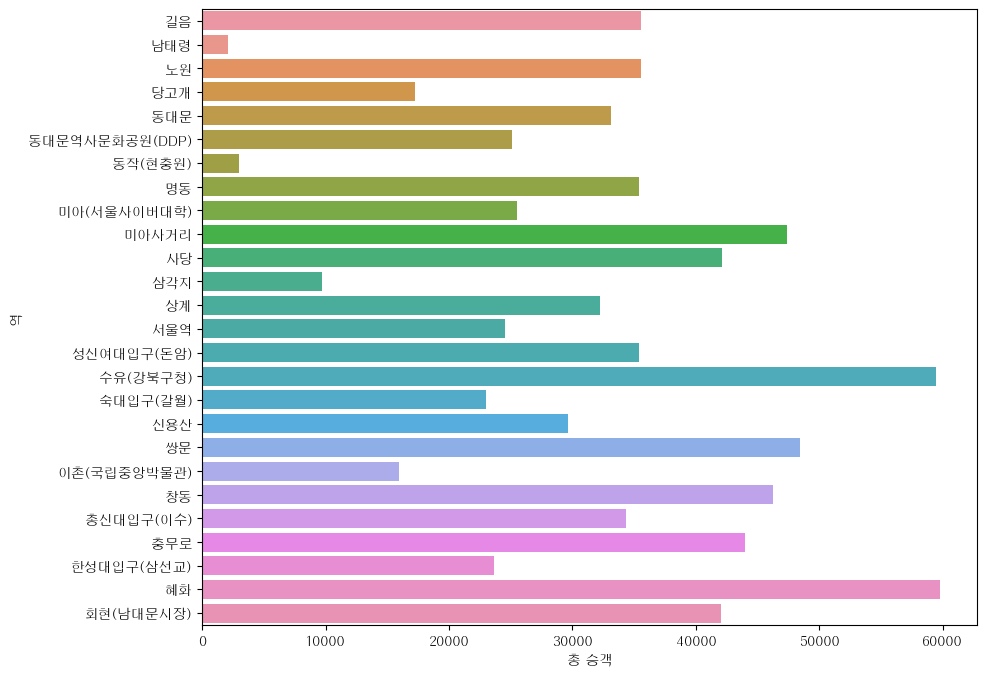

In [313]:
plt.subplots(figsize=(10, 8))
sns.barplot(data=line4, x="총 승객", y=line4.index)
plt.show()

#### 5호선

In [314]:
line5=df9[df9.노선=="5호선"].groupby(["역"]).mean()
line5

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
강동,15946.942387,15318.193416,31265.135802,628.748971,4.526749,15.703704
강일,3702.493827,3539.522634,7242.016461,162.971193,4.526749,15.703704
개롱,5499.695473,5734.135802,11233.831276,-234.440329,4.526749,15.703704
개화산,4847.629630,4643.946502,9491.576132,203.683128,4.526749,15.703704
거여,8533.473251,8130.164609,16663.637860,403.308642,4.526749,15.703704
고덕,8196.283951,8147.679012,16343.962963,48.604938,4.526749,15.703704
공덕,11461.197531,12077.213992,23538.411523,-616.016461,4.526749,15.703704
광나루(장신대),11834.312757,10871.415638,22705.728395,962.897119,4.526749,15.703704
광화문(세종문화회관),25100.012346,26133.000000,51233.012346,-1032.987654,4.526749,15.703704


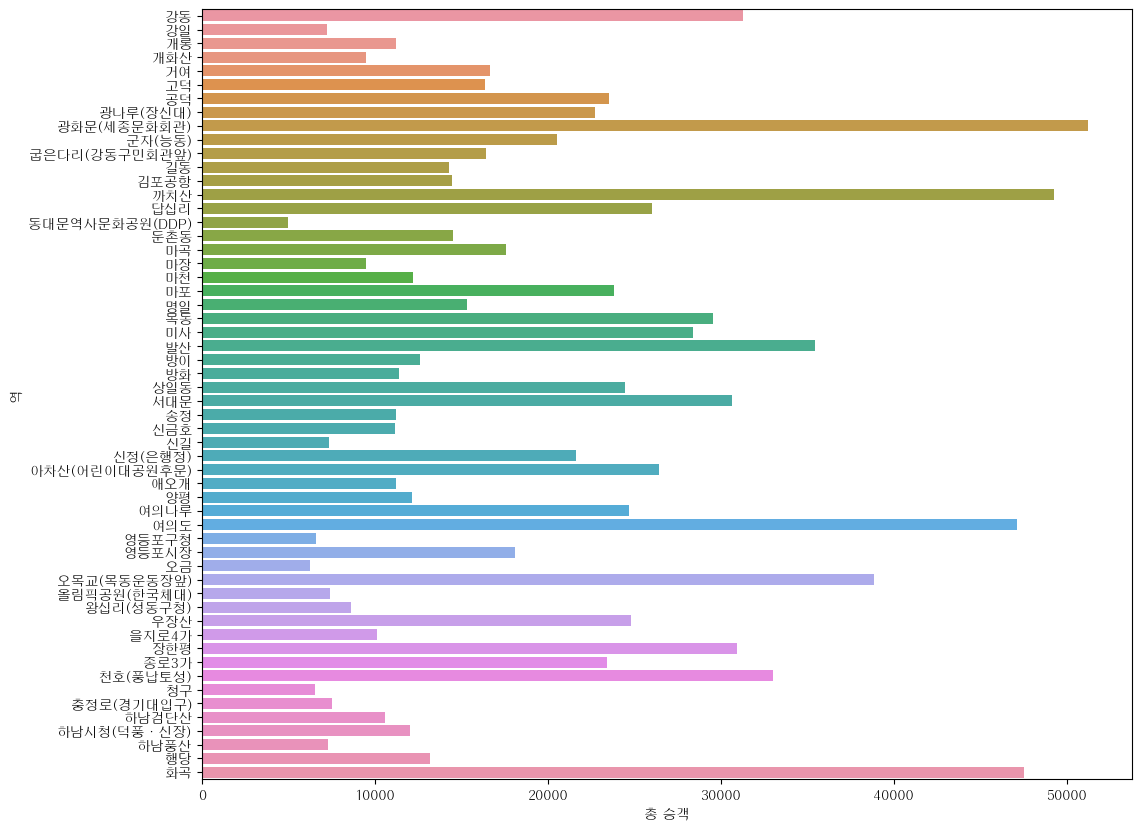

In [318]:
plt.subplots(figsize=(12, 10))
sns.barplot(data=line5, x="총 승객", y=line5.index)
plt.show()

#### 6호선

In [319]:
line6=df9[df9.노선=="6호선"].groupby(["역"]).mean()
line6

,승차승객,하차승객,총 승객,승차-하차,월,일
역,,,,,,
고려대(종암),7069.934156,6862.757202,13932.691358,207.176955,4.526749,15.703704
공덕,15209.423868,14675.567901,29884.991770,533.855967,4.526749,15.703704
광흥창(서강),7689.576132,7410.555556,15100.131687,279.020576,4.526749,15.703704
구산,6676.189300,4998.547325,11674.736626,1677.641975,4.526749,15.703704
녹사평(용산구청),4580.880658,4682.382716,9263.263374,-101.502058,4.526749,15.703704
대흥(서강대앞),7128.041152,7319.423868,14447.465021,-191.382716,4.526749,15.703704
독바위,2390.839506,2558.485597,4949.325103,-167.646091,4.526749,15.703704
돌곶이,8169.259259,7571.621399,15740.880658,597.637860,4.526749,15.703704
동묘앞,7255.641975,7291.049383,14546.691358,-35.407407,4.526749,15.703704


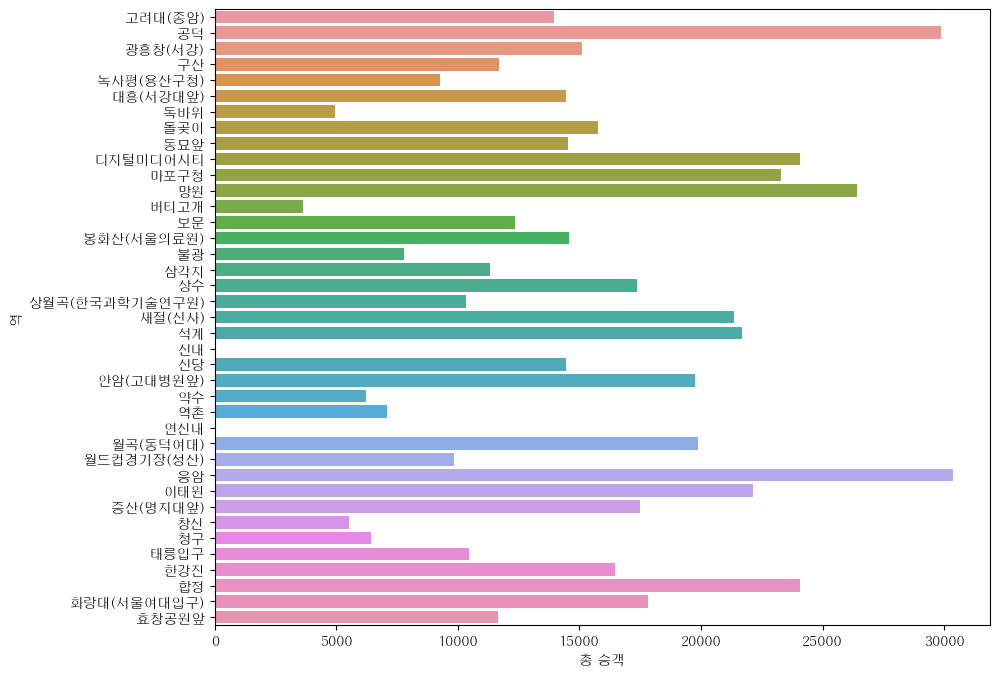

In [320]:
plt.subplots(figsize=(10, 8))
sns.barplot(data=line6, x="총 승객", y=line6.index)
plt.show()

### 워드 클라우드로 표현

In [339]:
station_name = np.sort(df9.역.unique())
station_code = pd.DataFrame(list(enumerate(station_name)), columns=['역코드','역'])
station_code

,역코드,역
0,0,4.19민주묘지
1,1,가능
2,2,가락시장
3,3,가산디지털단지
4,4,가양
...,...,...
524,524,회기
525,525,회룡
526,526,회현(남대문시장)
527,527,효창공원앞


In [340]:
station_code['환승역 수'] = station_code.역.map(s)
station_code

,역코드,역,환승역 수
0,0,4.19민주묘지,1
1,1,가능,1
2,2,가락시장,2
3,3,가산디지털단지,2
4,4,가양,1
...,...,...,...
524,524,회기,1
525,525,회룡,1
526,526,회현(남대문시장),1
527,527,효창공원앞,2


In [341]:
wc=station_code.set_index("역").to_dict()["환승역 수"]

In [342]:
img=Image.open("./Det.png")
imgArray=np.array(img)

#### 환승역 개수로 만든 워드 클라우드

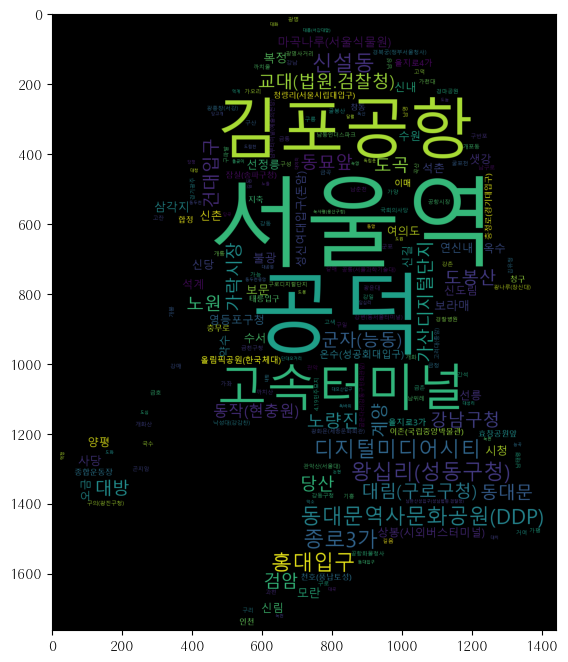

In [361]:
wordcloud = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, mask=imgArray)
gen =wordcloud.generate_from_frequencies(wc)
plt.figure(figsize=(20,8))
plt.imshow(gen)

### 결과
 - 연결되는 노선이 많은 환승역일수록 글자가 크게 나온다는 것을 볼 수 있다

#### 총 승객으로 만든 워드 클라우드

In [344]:
wc2=df9.set_index("역").to_dict()["총 승객"]

In [355]:
img2=Image.open("./img6.png")
imgArray2=np.array(img2)

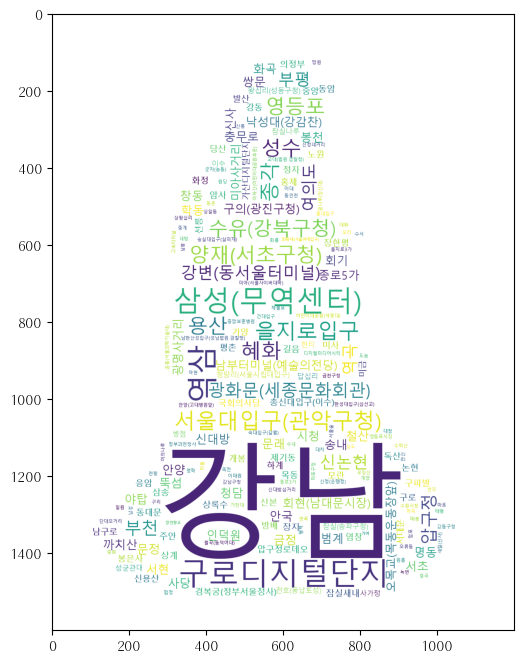

In [362]:
wordcloud = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250, background_color="white", mask=imgArray2)
gen =wordcloud.generate_from_frequencies(wc2)
plt.figure(figsize=(20,8))
plt.imshow(gen)

### 결과
 - 총 승객이 많은 역일수록 글자가 크게 나온다는 것을 알 수 있다